In [3]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta,date
%matplotlib inline

In [4]:

df = pd.read_csv('turnstile_190525.txt',parse_dates=[['DATE','TIME']])
dftemp = pd.read_csv('turnstile_190525.txt')
df['DATE'] = dftemp['DATE']
## Fix column names in case there's whitespaces
df.columns = [col.strip() for col in list(df.columns)]

## Get the difference between Entries and Exits counters in new columns. 
df['New_Entries'] = df.ENTRIES.shift(-1)-df.ENTRIES
df['New_Exits'] = df.EXITS.shift(-1) - df.EXITS

## That was an easy way to calculate difference, but there will be discrepency with different turnstiles.
## Here we get risubway.groupby('')d of outliers and negative numbers. Upper limit for realistic volume is 7000
df = df[(df.New_Entries > 0) & (df.New_Entries < 7000) & 
                (df.New_Exits > 0) & (df.New_Exits < 7000)]


## Drop columns not needed: Division, Date, Time, DESC, Entries, and Exits
df = df.drop(['DIVISION', 'DESC', 'ENTRIES', 'EXITS'], 1)



In [5]:
df

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DATE,New_Entries,New_Exits
0,2019-05-18 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,05/18/2019,24.0,3.0
1,2019-05-18 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,05/18/2019,24.0,34.0
2,2019-05-18 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,05/18/2019,98.0,86.0
3,2019-05-18 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,05/18/2019,208.0,50.0
4,2019-05-18 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,05/18/2019,262.0,34.0
5,2019-05-18 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,05/18/2019,183.0,23.0
6,2019-05-19 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,05/19/2019,28.0,6.0
7,2019-05-19 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,05/19/2019,8.0,19.0
8,2019-05-19 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,05/19/2019,77.0,49.0
9,2019-05-19 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,05/19/2019,199.0,44.0


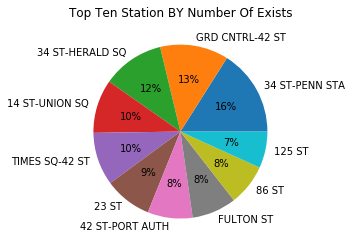

In [6]:
Exits_pie = df.groupby('STATION').sum().sort_values('New_Exits',ascending=False)
plt.pie(Exits_pie.head(10).New_Exits,labels= Exits_pie.head(10).index.values,autopct='%1.0f%%');
plt.title("Top Ten Station BY Number Of Exists");

In [9]:
#The chart is sorted by Number of exits beacuse we focused in it.
Exits_bar=df.groupby(['STATION','UNIT','SCP']).sum().sort_values("New_Exits", ascending=False)
df.nlargest(10,'New_Exits').plot.bar(loglog=False,figsize=(16,8),stacked=False);

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x121f27378> (for post_execute):


ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

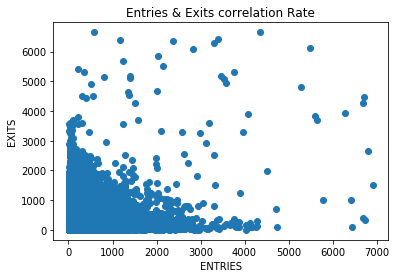

In [29]:
plt.scatter(df['New_Exits'],df['New_Entries'])
plt.title("Entries & Exits correlation Rate")
plt.xlabel("ENTRIES")
plt.ylabel("EXITS")
plt.show()

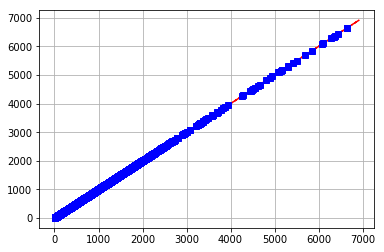

In [38]:
plt.plot(df['New_Exits'], df['New_Exits'], 'r--', df['New_Entries'], df['New_Entries'], 'bs')
plt.grid(True)
plt.show()

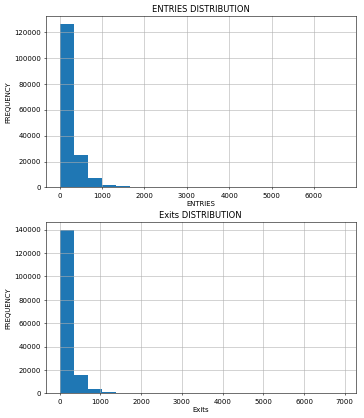

In [48]:
#plt.figure(1)
plt.figure(num=None, figsize=(8, 10), dpi=50, facecolor='w', edgecolor='g')
plt.subplot(211)
plt.hist(df['New_Entries'],bins = 20)
plt.title("ENTRIES DISTRIBUTION")
plt.xlabel("ENTRIES")
plt.ylabel("FREQUENCY")
plt.grid(True)

plt.subplot(212)
plt.hist(df['New_Exits'],bins = 20)
plt.title("Exits DISTRIBUTION")
plt.xlabel("Exits")
plt.ylabel("FREQUENCY")
plt.grid(True)
plt.show()